# Import libraries & data

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [9]:
path = "D:\Predict_Future_Sales"

In [28]:
item_categories = pd.read_csv(os.path.join(path, "item_categories.csv"))
items = pd.read_csv(os.path.join(path, "items.csv"))
shops = pd.read_csv(os.path.join(path, "shops.csv"))
train = pd.read_csv(os.path.join(path, "sales_train.csv"))

In [30]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [31]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [32]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Above three datas are good for training model? ...Well I don't know  
I will preprocess about train data. See the score of model only using that and return to use them or not.

In [35]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [36]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [41]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [45]:
train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Looks like train data doesn't have Nan values

In [47]:
train["date"]

0          02.01.2013
1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 2935849, dtype: object

In [53]:
np.array(train["date"])

array(['02.01.2013', '03.01.2013', '05.01.2013', ..., '14.10.2015',
       '22.10.2015', '03.10.2015'], dtype=object)

In [62]:
train["date"]

0          02.01.2013
1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 2935849, dtype: object

In [70]:
format="%d.%m.%Y"
train["date"] = pd.to_datetime(train["date"], format=format)

In [82]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


# Radin data EDA

In [80]:
np.unique(train["item_cnt_day"].values)

array([-2.200e+01, -1.600e+01, -9.000e+00, -6.000e+00, -5.000e+00,
       -4.000e+00, -3.000e+00, -2.000e+00, -1.000e+00,  1.000e+00,
        2.000e+00,  3.000e+00,  4.000e+00,  5.000e+00,  6.000e+00,
        7.000e+00,  8.000e+00,  9.000e+00,  1.000e+01,  1.100e+01,
        1.200e+01,  1.300e+01,  1.400e+01,  1.500e+01,  1.600e+01,
        1.700e+01,  1.800e+01,  1.900e+01,  2.000e+01,  2.100e+01,
        2.200e+01,  2.300e+01,  2.400e+01,  2.500e+01,  2.600e+01,
        2.700e+01,  2.800e+01,  2.900e+01,  3.000e+01,  3.100e+01,
        3.200e+01,  3.300e+01,  3.400e+01,  3.500e+01,  3.600e+01,
        3.700e+01,  3.800e+01,  3.900e+01,  4.000e+01,  4.100e+01,
        4.200e+01,  4.300e+01,  4.400e+01,  4.500e+01,  4.600e+01,
        4.700e+01,  4.800e+01,  4.900e+01,  5.000e+01,  5.100e+01,
        5.200e+01,  5.300e+01,  5.400e+01,  5.500e+01,  5.600e+01,
        5.700e+01,  5.800e+01,  5.900e+01,  6.000e+01,  6.100e+01,
        6.200e+01,  6.300e+01,  6.400e+01,  6.500e+01,  6.600e

?! I thought *item_cnt_day* values are almost 1  
Visualize this feature to check it

(array([2.93581e+06, 2.40000e+01, 1.10000e+01, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -22. ,  197.1,  416.2,  635.3,  854.4, 1073.5, 1292.6, 1511.7,
        1730.8, 1949.9, 2169. ]),
 <BarContainer object of 10 artists>)

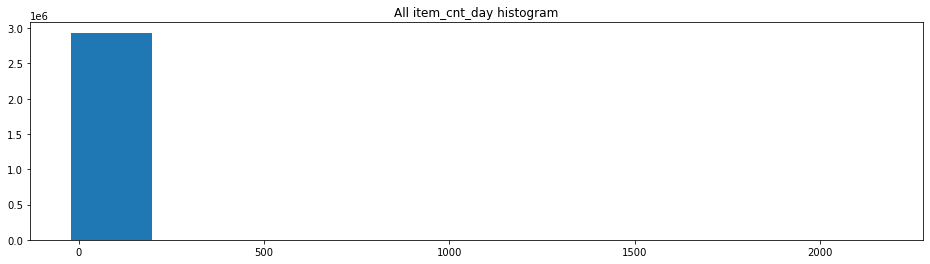

In [136]:
plt.figure(figsize=(16,4))
plt.title("All item_cnt_day histogram")
plt.hist(train["item_cnt_day"])

(array([1.0083e+04, 1.8000e+01, 1.2000e+01, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  226.8,  442.6,  658.4,  874.2, 1090. , 1305.8, 1521.6,
        1737.4, 1953.2, 2169. ]),
 <BarContainer object of 10 artists>)

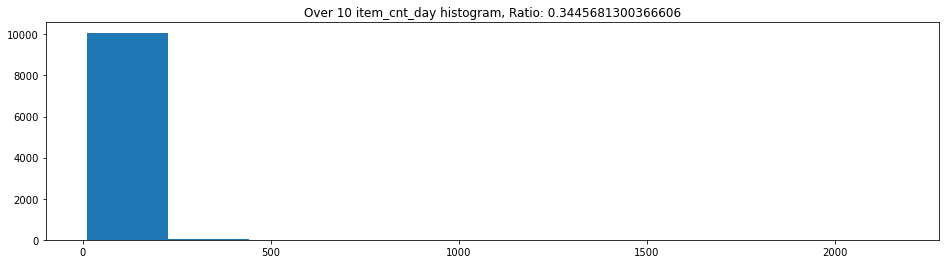

In [147]:
plt.figure(figsize=(16,4))
plt.title("Over 10 item_cnt_day histogram, Ratio: " +str(len(train["item_cnt_day"][train["item_cnt_day"]>10])/len(train["item_cnt_day"])*100))
plt.hist(train["item_cnt_day"][train["item_cnt_day"]>10])

(array([1.0083e+04, 1.8000e+01, 1.2000e+01, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  226.8,  442.6,  658.4,  874.2, 1090. , 1305.8, 1521.6,
        1737.4, 1953.2, 2169. ]),
 <BarContainer object of 10 artists>)

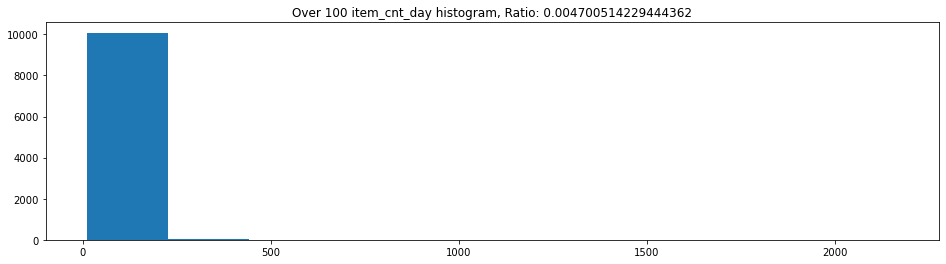

In [148]:
plt.figure(figsize=(16,4))
plt.title("Over 100 item_cnt_day histogram, Ratio: " +str(len(train["item_cnt_day"][train["item_cnt_day"]>100])/len(train["item_cnt_day"])*100))
plt.hist(train["item_cnt_day"][train["item_cnt_day"]>10])

(array([1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 2.000000e+00, 7.000000e+00,
        9.200000e+01, 2.636624e+06]),
 array([-22. , -19.7, -17.4, -15.1, -12.8, -10.5,  -8.2,  -5.9,  -3.6,
         -1.3,   1. ]),
 <BarContainer object of 10 artists>)

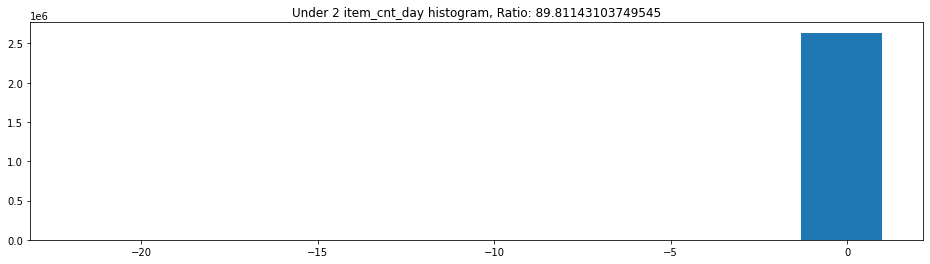

In [162]:
plt.figure(figsize=(16,4))
plt.title("Under 2 item_cnt_day histogram, Ratio: " +str(len(train["item_cnt_day"][train["item_cnt_day"]<=1])/len(train["item_cnt_day"])*100))
plt.hist(train["item_cnt_day"][train["item_cnt_day"]<=1])

In [165]:
print("1's Ratio to all data: ", len(train["item_cnt_day"][train["item_cnt_day"]==1])/len(train["item_cnt_day"])*100)

1's Ratio to all data:  89.56087319204768


Almost 90% of labels are *1*!!

<AxesSubplot:>

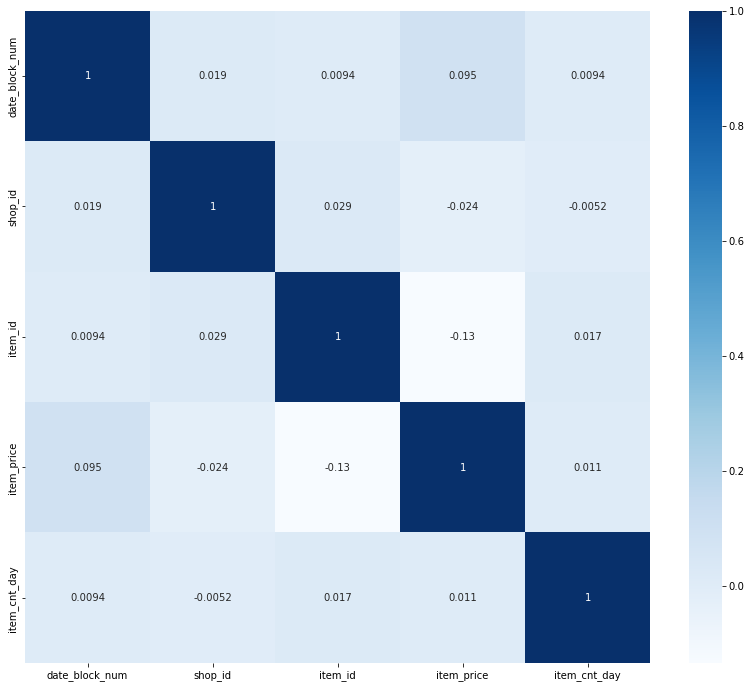

In [184]:
plt.figure(figsize=(14, 12))
sns.heatmap(train.corr(), annot=True, cmap=plt.cm.Blues)

Looks all values have small correlation

(array([  9857.,   5678.,  25991.,  25532.,  38242.,  38179.,  82663.,
         58076.,   3412.,   3751.,  21397.,    499.,  34694.,  17824.,
         36979.,  59511.,  52734.,  22950.,  53227.,  63911.,   1792.,
         58133.,  45434.,   6963.,  53032., 186104.,  53910., 105366.,
        142234.,  49225.,  50860., 235636.,   7947.,   5027.,   5752.,
         58445.,    306.,  39638.,  46013.,  13440.,   4257.,  41967.,
        109253.,  39282.,  39530.,  35891.,  66321.,  56695.,  21612.,
         15849.,  65173.,  44433.,  43502.,  52921., 143480.,  34769.,
         69573., 117428., 113549.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64),
 <BarContainer object of 59 artists>)

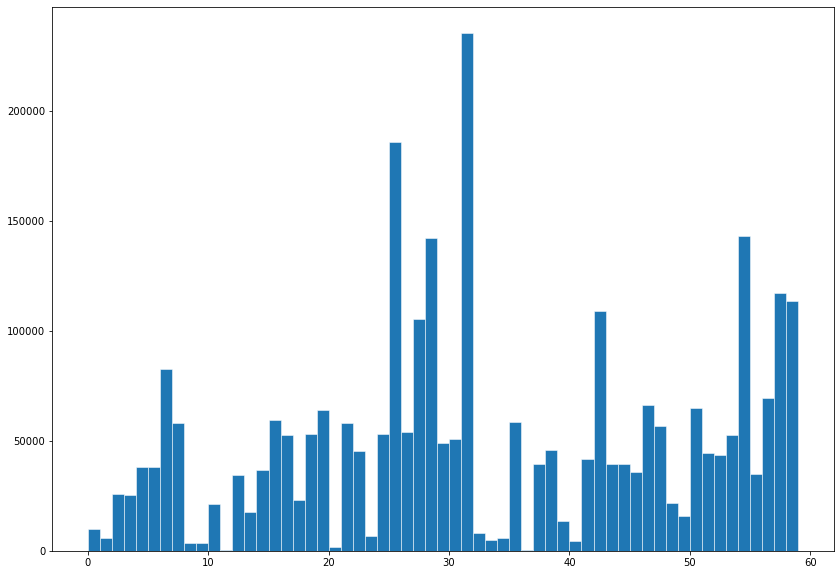

In [190]:
plt.figure(figsize=(14, 10))
plt.hist(train["shop_id"], bins=np.unique(train["shop_id"]), edgecolor="white", linewidth=0.5)

Text(0, 0.5, 'Item price mean per shop id')

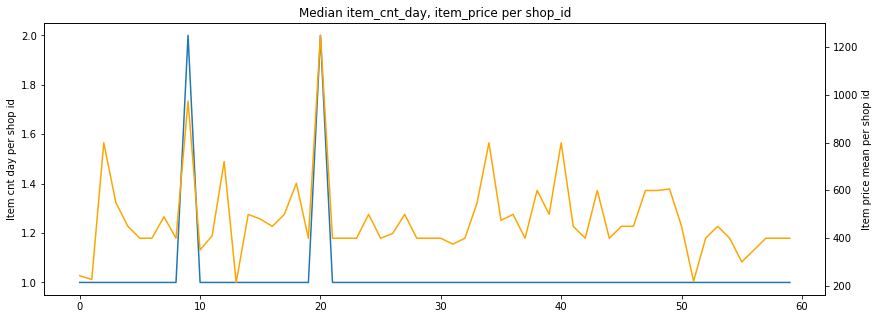

In [235]:
fig, ax = plt.subplots(figsize=(14,5))
ax.set_title("Median item_cnt_day, item_price per shop_id")
ax.plot(np.unique(train["shop_id"]), train.groupby("shop_id").median()["item_cnt_day"])
ax.set_ylabel("Item cnt day per shop id")
ax2 = ax.twinx()
ax2.plot(np.unique(train["shop_id"]), train.groupby("shop_id").median()["item_price"], color="orange")
ax2.set_ylabel("Item price mean per shop id")

In [242]:
train.groupby("shop_id").median()[train.groupby("shop_id").median()["item_cnt_day"]>1.5][["item_price", "item_cnt_day"]]

,item_price,item_cnt_day
shop_id,,
9,974.125,2.0
20,1249.000,2.0


(array([189278., 141498.,  91430.,  96194.,  56451.,  20896.,  17561.,
          9491.,   5459.,   4049.]),
 array([1000., 1400., 1800., 2200., 2600., 3000., 3400., 3800., 4200.,
        4600., 5000.]),
 <BarContainer object of 10 artists>)

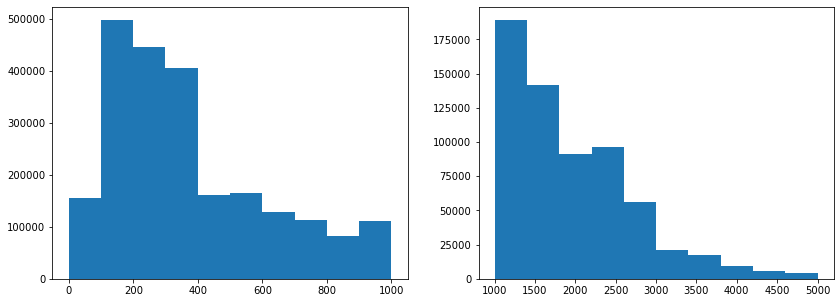

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].hist(train["item_price"][train["item_price"]<1000])
ax[1].hist(train["item_price"][train["item_price"].between(1000, 5000)])